In [20]:
import matplotlib.pyplot as plt

from files.tfct import TFCT
from itfct import ITFCT

In [21]:
import pandas as pd

## 1/ Préallocation de mémoire

On va initialiser l'objet TFCT afin de récupérer les données

In [22]:
# a = TFCT("files\\sound.wav")
# a.cut_signal()
# a.apply_fft_on_window()
# a.apply_fft_on_trames()
# a.build_xmat()
# xmat = a.x_mat
# nhop = a.n_hop
# nfft = a.n_fft
# freq = a.freq
from matplotlib import pyplot as plt

import numpy as np
from scipy.io import wavfile
xmat = np.load("files\\xmat.npy")

Puis on initialise l'objet ITFCT qui va remplir un vecteur y de : nb_trams * (tram_len - (tram_len - tram_step))

In [23]:
xmat = np.load("files\\xmat.npy")
nhop = 128
nfft = 668
freq = 16000
a = ITFCT(xmat, nhop, nfft, freq)

# 2 - 3/ Reconstitution des trames et addition

Pour reconstruire les trames de base, pour chaque colone, nous allons dupliquer toute les valeurs (sauf la premiere et la derniere), inversé l'ordre des elements du vecteur dupliqué et l'ajouter au vecteur de base. (Fait de base dans l'init de ITFCT)

En suite on offset les trames de $nhop*n$ (avec n l'index d'une trame) et les additiones

# 4/ La normalisation

Pour normaliser, il faut en premier lieu faire la somme de chanque élement de la fenetre de Hamming diviser par nHop, puis diviser y par cette somme

In [24]:
a.normalisation()

0     -9.027692e+06+0.000000e+00j
1      3.851330e+06+1.197940e+04j
2     -5.520993e+03-4.248991e+02j
3     -2.689333e+03-8.453942e+03j
4      6.165225e+03+2.018555e+04j
                  ...            
508    2.956526e+04-2.205203e+03j
509   -2.078335e+04-7.988388e+03j
510    1.915583e+04+2.087985e+04j
511   -1.819156e+04-8.904058e+03j
512    2.362193e+04+0.000000e+00j
Length: 513, dtype: complex128

# 5/ Test de l’algorithme

# Application au débruitage pour soustraction spectrale
# 6 /

In [25]:
freq, x_vect = wavfile.read("files\\mix.wav")

In [26]:
tfct = TFCT("files\\mix.wav")

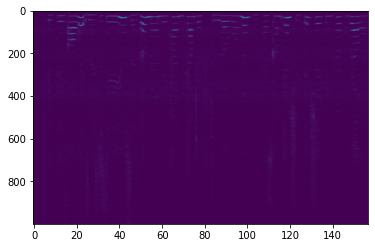

In [27]:
tfct.cut_signal()
tfct.apply_fft_on_window()
tfct.apply_fft_on_trames()
tfct.build_xmat()
plt.imshow(tfct.x_mat.T,aspect=0.1)
tfct.play_sound(int(16000/2))

On peut entendre que la première demie seconde ne contient que du bruit

# 7/

In [28]:
tfct2 = TFCT("files\\mix.wav")
tfct2.x_vect = tfct.x_vect[:8000]
tfct2.df_x_vect = tfct.df_x_vect[:8000]

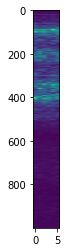

In [29]:
tfct2.cut_signal()
tfct2.apply_fft_on_window()
tfct2.apply_fft_on_trames()
tfct2.build_xmat()

plt.imshow(tfct2.x_mat.T.abs(),aspect=0.05)

On va donc afficher le du bruit.

In [30]:
data = np.fft.fft(abs(x_vect[:8000]))
freq_data = np.fft.fftfreq(8000,1/freq)
df = pd.DataFrame(index=freq_data,data=data)

<AxesSubplot:>

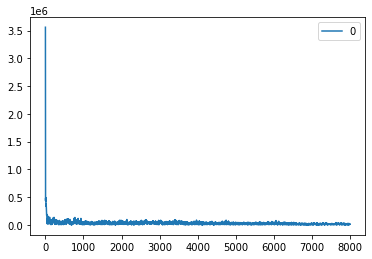

In [31]:
df.abs().iloc[:4000].plot()

On peut remarqué un pic en 0 ce qui correspond a signal constant, et beaucoup de petits pics sur toutes les fréquences correspondent au bruit

# 8/ Débruitage

In [32]:
df1 = pd.DataFrame((abs(tfct.x_mat)-abs(tfct2.x_mat.iloc[0])))
df1[df1<=0] = 0

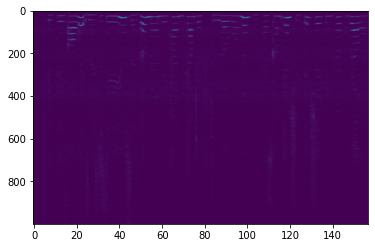

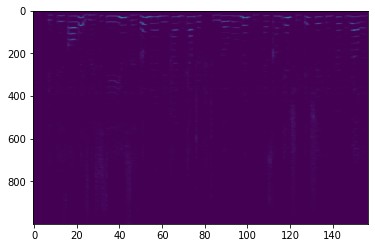

In [33]:
plt.imshow(tfct.x_mat.T,aspect=0.10)
plt.show()
plt.imshow(df1.T,aspect=0.10,)

Le premier spectre correspond est le signal de base et le second est le signal débruiter

On peut distinguer une légère diminution du bruit sur le second spectre

# 9/

La mise a 0 des valeurs négative permet de ne pas réinjecter du bruit en utilisant des valeurs absoluts par exemple

# 10/ Reconstrustion du signal
Pas possible car la premiere partie ne fonctionne pas

In [34]:
reconst_signal = ITFCT(df1.values,tfct.n_hop, tfct.n_fft, tfct.freq)

AttributeError: 'TFCT' object has no attribute 'nhop'

On peut imaginer une diminution de la qualité du signal de base dut à la réduction de certaine fréquence sur toutes les trames